In [2]:
import pandas as pd

In [4]:
data=pd.read_csv("C:/Users/rlawl/김진영/미세먼지_서울대공원.csv", encoding='cp949',engine='python')
data.head()

,측정일자,미세먼지(㎍/㎥),서울대공원입장객수
0,20190101,38.047619,"1,524"
1,20190102,34.809524,634
2,20190103,39.428571,777
3,20190104,57.000000,690
4,20190105,63.142857,"1,601"


In [8]:
data.isnull().sum()

측정일자         0
미세먼지(㎍/㎥)    0
서울대공원입장객수    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 3 columns):
측정일자         113 non-null int64
미세먼지(㎍/㎥)    113 non-null float64
서울대공원입장객수    113 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB


In [12]:
# object type을 변환시킨다.

In [17]:
data['서울대공원입장객수'] = data['서울대공원입장객수'].str.replace(',','').astype(int)

In [20]:
# info()로 보면 컬럼 "서울대공원입장객수" type이 int로 바뀜을 볼 수 있다.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 3 columns):
측정일자         113 non-null int64
미세먼지(㎍/㎥)    113 non-null float64
서울대공원입장객수    113 non-null int32
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.3 KB


In [23]:
data.head()

,측정일자,미세먼지(㎍/㎥),서울대공원입장객수
0,20190101,38.047619,1524
1,20190102,34.809524,634
2,20190103,39.428571,777
3,20190104,57.000000,690
4,20190105,63.142857,1601


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
Y=data['서울대공원입장객수']
X=data.drop(['서울대공원입장객수'], axis=1, inplace=False)

In [37]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=100)

In [38]:
lr=LinearRegression()

In [39]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
Y_predict=lr.predict(X_test)

In [44]:
import numpy as np

In [46]:
mse=mean_squared_error(Y_test, Y_predict)
rmse=np.sqrt(mse)

In [47]:
print('MSE : {0:.3F}, RMSE : {1:.3f}'.format(mse,rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 37764104.458, RMSE : 6145.251
R^2(Variance score) : 0.161


In [49]:
print('Y 절편 값 : ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값 :  -531316397.29055184
회귀 계수 값:  [ 26.3 -20.5]


In [50]:
coef=pd.Series(data=np.round(lr.coef_, 1), index=X.columns)

In [51]:
coef.sort_values(ascending=False)

측정일자         26.3
미세먼지(㎍/㎥)   -20.5
dtype: float64

In [52]:
import matplotlib.pyplot as plt

In [53]:
import seaborn as sns

In [54]:
%matplotlib inline

In [96]:
# fig, axs=plt.subplots(2,2)
# x_features = ['미세먼지(㎍/㎥)']
# for i, feature in enumerate(x_features):   
#     row = i//3
#     col = i%3
#     print("i = %d , feature = %s ,  row = %d, col = %d" %(i, feature, row, col))
#     sns.regplot(x=feature, y='서울대공원입장객수', data=data, ax=axs[row][col])

Text(0, 0.5, 'mise(㎍/㎥)')

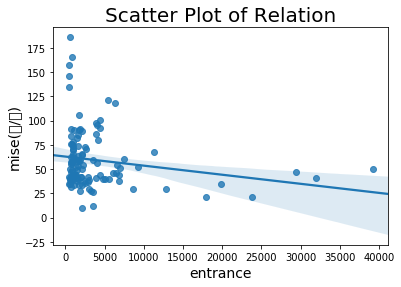

In [95]:

# Basic Scatter Plot by seaborn

sns.regplot(x=data['서울대공원입장객수'], 

           y=data['미세먼지(㎍/㎥)'], 

           fit_reg=True)


plt.title('Scatter Plot of Relation', fontsize=20)

plt.xlabel('entrance', fontsize=14)

plt.ylabel('mise(㎍/㎥)', fontsize=14)

